# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from datetime import datetime
from enum import Enum, auto
from pathlib import Path
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe, Individual
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import Drawer
from tessellation.procgen import Action, GenerationResult
from tessellation.procgen.ga import heuristic, mutate
from tessellation.procgen.ga.ga_generator import GATessellationGenerator

## Configuration

### Proc Gen constants

In [3]:
# Proc gen constants #
SEED = 32
SIDE_LEN = 100

### Genetic algorithm constants

In [4]:
# General
POPULATION_SIZE = 50
MAX_GENERATIONS = 100

# Heuristics
HEURISTIC_FNS = [
    # lambda phenome:  heuristic.bottom_top_not_even_penalty(phenome, max_diff_before_penalty=20),
    heuristic.duplicated_points_penalty,
    lambda phenome: heuristic.out_of_bounds_penalty(phenome, SIDE_LEN),
    heuristic.count_number_points_reward,
    lambda phenome:  heuristic.bottom_top_even_reward(phenome, max_diff_before_reward=20),
]
HEURISTIC_FN_WEIGHTS = np.array([1, 0.2, 1, 1, 10])

# Mutation
SUBSTITUTION_PROB, INSERTION_PROB, DELETION_PROB = 0.1, 0.1, 0.1
ACTION_PROBS = np.ones(len(Action)) / len(Action)
MUTATION_FNS = [
    lambda individual_iterator: mutate.apply_mutation(
        mutate.substitute_action,
        individual_iterator,
        fn_kwargs={"action_probs": ACTION_PROBS},
    ),
    lambda individual_iterator: mutate.apply_mutation(
        mutate.insert_action,
        individual_iterator,
        fn_kwargs={"action_probs": ACTION_PROBS},
    ),
    lambda individual_iterator: mutate.apply_mutation(
        mutate.delete_action, individual_iterator
    ),
]

# Draw config
CMAP = "gray"
drawer = Drawer(CMAP)    

# Save config
SAVE_DIR = Path(f"saved_tessellations/ga/")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

## Genetic Algorithm

In [10]:
generator = GATessellationGenerator(
    heuristic_fns=HEURISTIC_FNS, 
    mutation_fns=MUTATION_FNS,
    heuristic_fn_weights=HEURISTIC_FN_WEIGHTS, 
    side_len=SIDE_LEN,
    max_generations=MAX_GENERATIONS,
    population_size=POPULATION_SIZE,
)
results = generator.evolve()

step,bsf
0,124.0
1,124.0
2,128.0
3,128.0
4,129.0
5,129.0
6,132.0
7,139.0
8,139.0
9,139.0
10,146.0
11,148.0
12,161.0
13,161.0
14,161.0
15,161.0
16,161.0
17,161.0
18,161.0
19,161.0
20,161.0
21,171.0
22,171.0
23,171.0
24,171.0
25,171.0
26,171.0
27,171.0
28,171.0
29,171.0
30,171.0
31,171.0
32,171.0
33,171.0
34,171.0
35,171.0
36,171.0
37,171.0
38,171.0
39,173.0
40,173.0
41,173.0
42,173.0
43,173.0
44,173.0
45,174.0
46,178.0
47,178.0
48,178.0
49,178.0
50,178.0
51,178.0
52,178.0
53,178.0
54,178.0
55,178.0
56,178.0
57,178.0
58,178.0
59,178.0
60,178.0
61,178.0
62,183.0
63,183.0
64,183.0
65,183.0
66,187.0
67,187.0
68,187.0
69,187.0
70,187.0
71,187.0
72,187.0
73,187.0
74,187.0
75,187.0
76,187.0
77,187.0
78,187.0
79,187.0
80,187.0
81,187.0
82,187.0
83,187.0
84,187.0
85,187.0
86,187.0
87,187.0
88,187.0
89,187.0
90,187.0
91,196.0
92,196.0
93,196.0
94,196.0
95,196.0
96,196.0
97,196.0
98,196.0
99,196.0
Invalid individual: Individual<c90a975f-56b8-4a47-8c98-d48b1d2f9cd9> with fitness -19819.0, returning

## Evaluate

Individual: 6; Fitness: 167.0


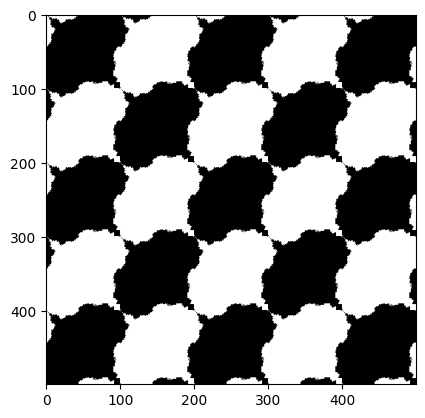

Press 's' to save, 'q' to quit, or 'enter' to continue...


In [ ]:
from IPython.display import clear_output

def display_tessellations(
    generation_results: list[GenerationResult], save_dir: Path, show: bool = True,
):
    """Display tessellations and allow user to save them."""
    should_continue = True
    for idx, result in enumerate(generation_results):
        print(f'Individual: {idx}; Fitness: {result.metadata["fitness"]}')
        
        tessellation = drawer.tessellate(result)
        drawer.draw(tessellation)
        if show:
            plt.show()
            print("Press 's' to save, 'q' to quit, or 'enter' to continue...")
            while True:
                user_action = input()
                if not user_action:
                    break

                elif user_action.lower() == "s":
                    print(
                        "Provide a name for the tessellation, or click 'enter' to use timestamp as name..."
                    )
                    save_name = input()
                    if not save_name:
                        save_name = f"{datetime.today().isoformat()}"

                    result.save_as_json(save_dir / f"{save_name}.json")
                    drawer.save_as_png(save_dir / f"{save_name}.png", tessellation)
                    break
                elif user_action.lower() == "q":
                    should_continue = False
                    break

        if should_continue:
            clear_output()
        else:
            break

display_tessellations(results, save_dir=SAVE_DIR)

## Read saved tessellations

In [ ]:
def load_and_display(tess_filename: str):
    result = GenerationResult.read_json(SAVE_DIR / f"{tess_filename}.json")
    tessellation = drawer.tessellate(result)
    drawer.draw(tessellation)

# load_and_display("cloud_puff")

In [ ]:
# load_and_display("alien_hand_holding")

In [ ]:
# load_and_display("trees")